In [1]:
#followed https://www.datacamp.com/community/tutorials/random-forests-classifier-python
# more info on random forest https://www.youtube.com/watch?v=RUEFSwN-orQ
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#fix balcony column
# drop columns lattitude longtitude eircode 



In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv('/Users/patrickmoloney/Downloads/data-rental2.csv', na_values = missing_value_formats)

In [3]:
df.head()

,approx,number,address 1,address 2,address 3,eircode,lattitude,longtitude,lattitude eyre square,longtitude eyre square,...,Distance GMIT,number of rooms,number of bathrooms,price per month,type,connection,BER,balcony,floor,heating
0,no,Chaplaincy House,Ballybane Road,Ballybane,NaN,H91 E2NY,53.279666,-9.008728,53.274839,-9.04863,...,0.209452,4,2,2100,house,NaN,d2,no,NaN,central
1,yes,NaN,cappagh road,knocknacarra,NaN,H91 PV0Y,53.271272,-9.132431,53.274839,-9.04863,...,8.135066,1,1,850,apartment,NaN,c1,no,ground,central
2,no,83,Maoilin,Ballymoneen Road,Moneen,H91 A6CH,53.271473,-9.121873,53.274839,-9.04863,...,7.434207,3,2,1800,house,NaN,a3,no,NaN,central
3,no,NaN,NaN,NaN,NaN,H91 W5RP,53.272302,-9.077226,53.274839,-9.04863,...,4.475861,1,1,850,apartment,NaN,NaN,no,ground,central
4,no,NaN,NaN,NaN,NaN,H91 K46R,53.273859,-9.026788,53.274839,-9.04863,...,1.176212,3,2,1600,house,NaN,d1,no,NaN,central


In [4]:
df.isna().sum()


approx                    206
number                    256
address 1                 194
address 2                 237
address 3                 360
eircode                   237
lattitude                   0
longtitude                  0
lattitude eyre square       0
longtitude eyre square      0
Distance Eyre Square        0
latitude salthill           0
longtitude salthill         0
Distance Salthill           0
latitude collage            0
longtitude collage          0
Distance NUIG               0
latitude gmit               0
longtitude gmit             0
Distance GMIT               0
number of rooms             0
number of bathrooms         0
price per month             0
type                        0
connection                265
BER                        14
balcony                     2
floor                     184
heating                     5
dtype: int64

In [5]:
df=df.drop(columns='eircode')
df=df.drop(columns='lattitude') 
df=df.drop(columns='longtitude')
df=df.drop(columns='floor')
df=df.drop(columns='approx')
df=df.drop(columns='number')
df=df.drop(columns='address 1')
df=df.drop(columns='address 2')
df=df.drop(columns='address 3')
df=df.drop(columns='lattitude eyre square')
df=df.drop(columns='longtitude eyre square')
df=df.drop(columns='latitude salthill')
df=df.drop(columns='longtitude salthill')
df=df.drop(columns='latitude collage')
df=df.drop(columns='longtitude collage')
df=df.drop(columns='latitude gmit')
df=df.drop(columns='longtitude gmit')


In [6]:
df.isna().sum()

Distance Eyre Square      0
Distance Salthill         0
Distance NUIG             0
Distance GMIT             0
number of rooms           0
number of bathrooms       0
price per month           0
type                      0
connection              265
BER                      14
balcony                   2
heating                   5
dtype: int64

In [7]:
df=df.drop(columns='connection')


In [8]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,type,BER,balcony,heating
0,2.706816,4.449858,3.520573,0.209452,4,2,2100,house,d2,no,central
1,5.586384,4.231058,4.789334,8.135066,1,1,850,apartment,c1,no,central
2,4.884620,3.551142,4.097072,7.434207,3,2,1800,house,a3,no,central
3,1.922237,1.068662,1.296991,4.475861,1,1,850,apartment,NaN,no,central
4,1.456473,3.093256,2.398740,1.176212,3,2,1600,house,d1,no,central


In [9]:

df.BER.unique() 

array(['d2', 'c1', 'a3', nan, 'd1', 'c3', 'c2', 'e1', 'exempt', 'e2',
       'b3', 'b1', 'f', 'b2', 'a1', 'g'], dtype=object)

In [10]:
df.heating.unique() 

array(['central', 'electric', nan], dtype=object)

In [11]:
df.balcony.unique()

array(['no', 'yes', nan], dtype=object)

In [12]:
df.type.unique()

array(['house', 'apartment', 'studio', 'townhouse'], dtype=object)

In [13]:

df = df.dropna() 

In [14]:
df.heating.unique()

array(['central', 'electric'], dtype=object)

In [15]:
df.BER.unique()

array(['d2', 'c1', 'a3', 'd1', 'c3', 'c2', 'e1', 'exempt', 'e2', 'b3',
       'b1', 'f', 'b2', 'a1', 'g'], dtype=object)

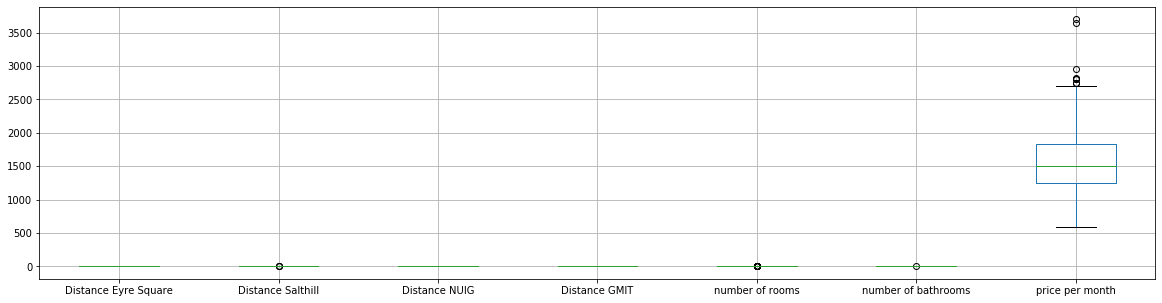

In [16]:
df.boxplot(figsize=(20,5))
plt.show() 

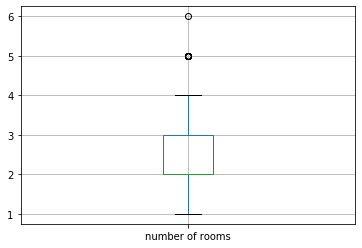

In [17]:
df.boxplot(column='number of rooms')
plt.show()

Place with 5 rooms its mentioned as an outlier, this could be down to how small my data set currently is. Will leave for the time being something that should be noted

update, its up to 6 now def added a few more ads with 5

In [18]:
df.describe()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,2.264945,2.639864,2.303819,3.541791,2.515873,1.751323,1559.224868
std,1.454716,1.655613,1.453199,1.848706,1.055998,0.733120,469.247651
min,0.007512,0.099173,0.311939,0.209452,1.000000,1.000000,595.000000
25%,1.012972,1.357497,1.118415,2.218692,2.000000,1.000000,1250.000000
50%,2.092012,2.362079,1.785046,3.154629,2.000000,2.000000,1500.000000
75%,3.051279,3.583553,3.277126,4.706173,3.000000,2.000000,1830.000000
max,5.586384,7.005967,6.308555,8.135066,6.000000,5.000000,3700.000000


In [19]:
scale_mapper = {
    "a1":15,
    "a2":14,
    "a3":13,
    "b1":12,
    "b2":11,
    "b3":10,
    "c1":9,
    "c2":8,
    "c3":7,
    "d1":6,
    "d2":5,
    "e1":4,
    "e2":3,
    "f":2,
    "g":1,
    "exempt":0
}

df['BER'] = df['BER'].replace(scale_mapper)

df.tail()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,type,BER,balcony,heating
390,2.345123,0.456042,2.242454,4.693170,2,1,1600,apartment,5,no,electric
391,1.539927,0.356783,1.500652,3.960231,5,2,2000,house,6,no,central
392,1.398883,0.528898,1.540958,3.739695,1,1,920,apartment,4,no,electric
393,5.087938,6.748020,5.912348,2.534640,1,1,810,apartment,0,no,central
394,4.670141,6.348894,5.487608,2.116635,2,1,1136,apartment,5,no,electric


In [20]:
df = pd.get_dummies(df, columns=['type', 'balcony','heating'])
df.tail()



,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,type_apartment,type_house,type_studio,type_townhouse,balcony_no,balcony_yes,heating_central,heating_electric
390,2.345123,0.456042,2.242454,4.693170,2,1,1600,5,1,0,0,0,1,0,0,1
391,1.539927,0.356783,1.500652,3.960231,5,2,2000,6,0,1,0,0,1,0,1,0
392,1.398883,0.528898,1.540958,3.739695,1,1,920,4,1,0,0,0,1,0,0,1
393,5.087938,6.748020,5.912348,2.534640,1,1,810,0,1,0,0,0,1,0,1,0
394,4.670141,6.348894,5.487608,2.116635,2,1,1136,5,1,0,0,0,1,0,0,1


looks like there is a connectiong where an appartment uses electic, houses use central, town houses and apartment have a link to having a balcony. more rooms have a link to central, likely because it's a house. price per moneth is linked to house + number of rooms. not too linked to salthill 

update: not sure if this sentence is accuarate anymore, better stuff down lower

In [21]:
del df['balcony_no']

In [22]:
del df['heating_central']

In [23]:
del df['type_townhouse']

In [24]:
df.head()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,type_apartment,type_house,type_studio,balcony_yes,heating_electric
0,2.706816,4.449858,3.520573,0.209452,4,2,2100,5,0,1,0,0,0
1,5.586384,4.231058,4.789334,8.135066,1,1,850,9,1,0,0,0,0
2,4.884620,3.551142,4.097072,7.434207,3,2,1800,13,0,1,0,0,0
4,1.456473,3.093256,2.398740,1.176212,3,2,1600,6,0,1,0,0,0
5,2.313815,1.099351,1.721166,4.863595,4,2,2390,7,0,1,0,0,0


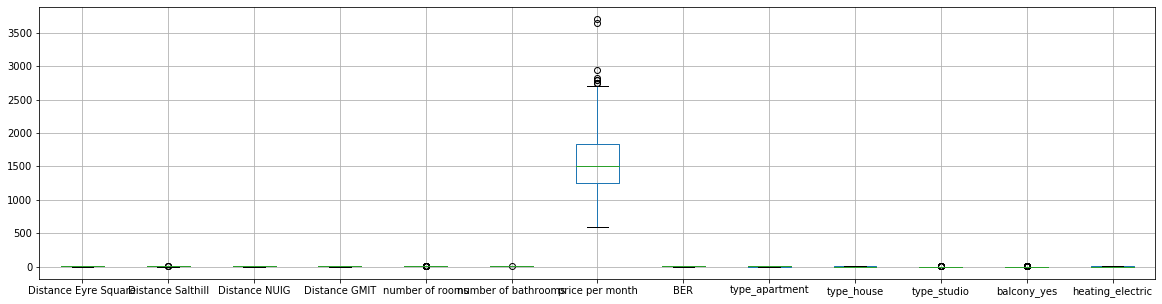

In [25]:
df.boxplot(figsize=(20,5))
plt.show()

distance from salthill, number of rooms, number of baths, pricer per month, ber , type_studio,balcony_yes

In [26]:
standard_scaler = StandardScaler()
df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms','BER']] = standard_scaler.fit_transform(df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms','BER']])



In [27]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,type_apartment,type_house,type_studio,balcony_yes,heating_electric
0,0.304154,1.094696,0.838403,-1.804914,1.407289,0.339654,2100,-0.335567,0,1,0,0,0
1,2.286249,0.962364,1.712642,2.487883,-1.437391,-1.026187,850,0.875358,1,0,0,0,0
2,1.803202,0.551147,1.235639,2.108272,0.459062,0.339654,1800,2.086284,0,1,0,0,0
4,-0.556496,0.274215,0.065406,-1.281282,0.459062,0.339654,1600,-0.032836,0,1,0,0,0
5,0.033638,-0.931712,-0.401477,0.715937,1.407289,0.339654,2390,0.269895,0,1,0,0,0


In [28]:
y = df['price per month']
X = df.drop('price per month', axis=1).values



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [29]:
y_test.head()

297    1350
367    1791
216    1250
79     1850
160    1400
Name: price per month, dtype: int64

In [30]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [31]:
RandomForestRegressor(bootstrap=True, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='gini',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=df.drop('price per month', axis=1).columns).sort_values(ascending=False)
feature_imp

number of rooms         0.486553
Distance NUIG           0.118310
Distance Salthill       0.106884
Distance Eyre Square    0.106771
BER                     0.054446
number of bathrooms     0.045547
Distance GMIT           0.043614
balcony_yes             0.010051
type_house              0.009051
heating_electric        0.008300
type_apartment          0.007201
type_studio             0.003273
dtype: float64

No handles with labels found to put in legend.


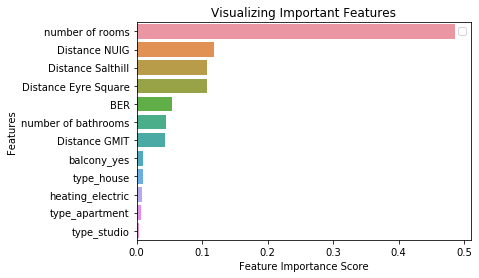

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=350)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("R2:",metrics.r2_score(y_test, y_pred))

R2: 0.7466620507005441


In [35]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))*100

    return loss #https://stackoverflow.com/questions/53165807/how-to-calculate-rmspe-in-python-using-numpy
# should be times 100? also should b divided by n? 
# maybe not? https://www.kaggle.com/c/rossmann-store-sales/overview/evaluation
# mean returns the average of the array, would be the same as dividing by the number n from the formula 

In [36]:
from sklearn import metrics
print("R2:",metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Square Percetage Error', rmse(y_test, y_pred) )

R2: 0.7466620507005441
Mean Absolute Error: 197.89822681704263
Mean Squared Error: 68031.95620497763
Root Mean Squared Error: 260.8293622370335
Root Mean Square Percetage Error 17.838374058442184
